In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
df.sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
704745,Toyota,Corolla L,2013,39101.0,Gas I4 1.8L/110,Automatic,Front-wheel Drive,Gasoline,26-34,Silver,NaN,0.0,1.0,1.0,Deluca Toyota,4.6,4.5,156.0,1000.0,15981.0
326349,Honda,Odyssey EX-L,2022,26940.0,3.5L V6 24V GDI SOHC,10-Speed Automatic,Front-wheel Drive,Gasoline,19-28,Obsidian Blue Pearl,Gray,0.0,1.0,1.0,Hare Honda,3.2,4.3,9.0,NaN,40115.0
558594,Nissan,Frontier PRO-4X,2021,0.0,3.8L V6 24V GDI DOHC,9-Speed Automatic,Four-wheel Drive,Gasoline,17-23,Magnetic Black Pearl,NaN,0.0,1.0,0.0,Wallace Mitsubishi,4.0,4.5,9.0,1000.0,39998.0


### Now as per the analysis from last trial, we need to seprate the data into differnet manufacturers

In [128]:
df['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
df[df['manufacturer'] == 'Acura'].sample()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
6095,Acura,TLX V6,2020,63652.0,3.5L V6 24V GDI SOHC,9-Speed Automatic,Front-wheel Drive,Gasoline,20-31,Majestic Black Pearl,Ebony,0.0,1.0,1.0,Lester Glenn Chrysler Dodge Jeep RAM,4.6,4.9,32.0,1000.0,22937.0
6057,Acura,TLX FWD,2015,110221.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-35,Brown,Parchment,1.0,1.0,1.0,Andy Mohr Toyota,3.4,4.5,125.0,1500.0,16000.0
4854,Acura,RDX Base,2020,32849.0,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,Front-wheel Drive,Gasoline,22-28,White,Ebony,0.0,0.0,1.0,AUTOSOURCE,4.7,4.6,97.0,NaN,42995.0


In [130]:
# man_lst = df['manufacturer'].unique()

# for m in man_lst:
#     df_m= df[df['manufacturer'] == m]

#     globals()[f'df_{m}'] = df_m

#     print(f'df for manufacturer {m} saved as df_{m}')


df for manufacturer Acura saved as df_Acura
df for manufacturer Audi saved as df_Audi
df for manufacturer BMW saved as df_BMW
df for manufacturer Buick saved as df_Buick
df for manufacturer Cadillac saved as df_Cadillac
df for manufacturer Chevrolet saved as df_Chevrolet
df for manufacturer Chrysler saved as df_Chrysler
df for manufacturer Dodge saved as df_Dodge
df for manufacturer Ford saved as df_Ford
df for manufacturer GMC saved as df_GMC
df for manufacturer Honda saved as df_Honda
df for manufacturer Hyundai saved as df_Hyundai
df for manufacturer INFINITI saved as df_INFINITI
df for manufacturer Jaguar saved as df_Jaguar
df for manufacturer Jeep saved as df_Jeep
df for manufacturer Kia saved as df_Kia
df for manufacturer Land Rover saved as df_Land Rover
df for manufacturer Lexus saved as df_Lexus
df for manufacturer Lincoln saved as df_Lincoln
df for manufacturer Mazda saved as df_Mazda
df for manufacturer Mercedes-Benz saved as df_Mercedes-Benz
df for manufacturer Mitsubishi s

In [131]:
# df_Ford.shape

(79526, 20)

### Let's start with ford as it is having the largest numbers of record in the whole dataset, we were able to get the a seprate dataframe for, now we can anlyse the `missing values`, `outliers`, observe and handle them properly.

In [132]:
# df = df_Ford

In [7]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature", "Unique Values", "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Unique Values,Missing Values,Missing Percentage
0,manufacturer,30,0,0.00
1,model,12187,0,0.00
2,year,100,0,0.00
3,mileage,158751,506,0.07
4,engine,6903,15050,1.97
5,transmission,1313,9904,1.30
6,drivetrain,33,21562,2.83
7,fuel_type,36,22927,3.01
8,mpg,865,142071,18.64
9,exterior_color,7681,8859,1.16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [11]:
## To analyse some underlying patterns from the string features, we'll create word cloud, what are the trends in the dataset

In [13]:
# Combine all the single words in 'product_name' column into one string
text_model = ' '.join(df['model'].dropna()) 
# text_year = ' '.join(df['year'].dropna())
text_engine = ' '.join(df['engine'].dropna())
text_transmission = ' '.join(df['transmission'].dropna())
text_mpg = ' '.join(df['mpg'].dropna())
text_exterior_color = ' '.join(df['exterior_color'].dropna())
text_interior_color = ' '.join(df['interior_color'].dropna())
text_seller_name = ' '.join(df['seller_name'].dropna())
# text_price = ' '.join(df['price'].dropna())

# Model

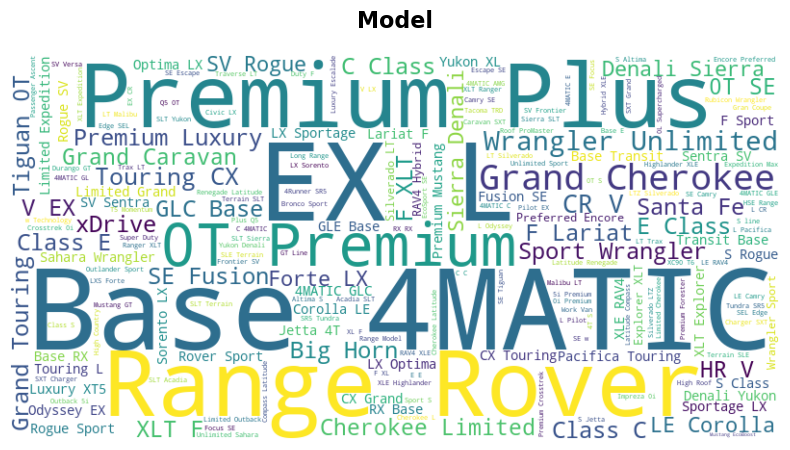

In [16]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_model)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Model", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

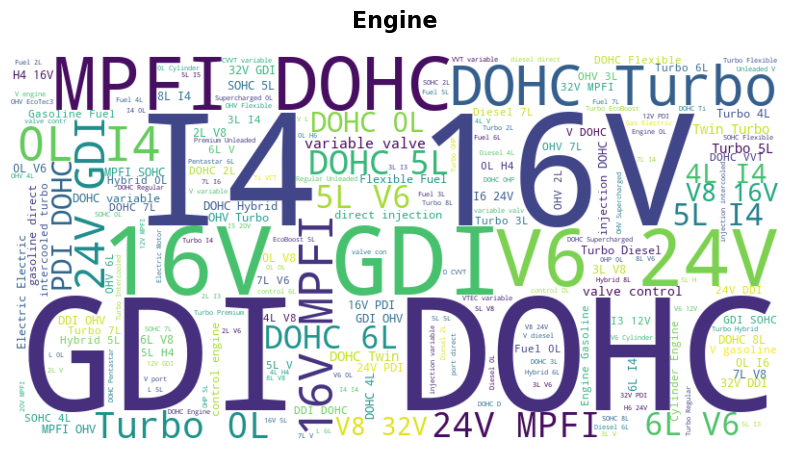

In [18]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_engine)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Engine", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

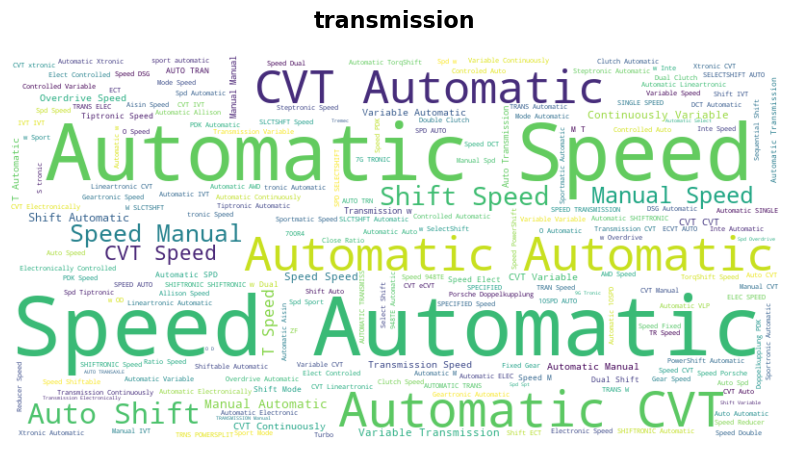

In [20]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_transmission)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("transmission", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

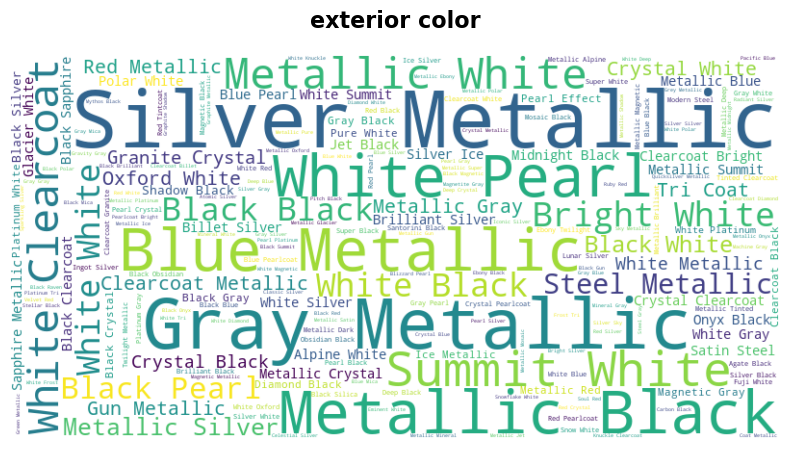

In [21]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_exterior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("exterior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

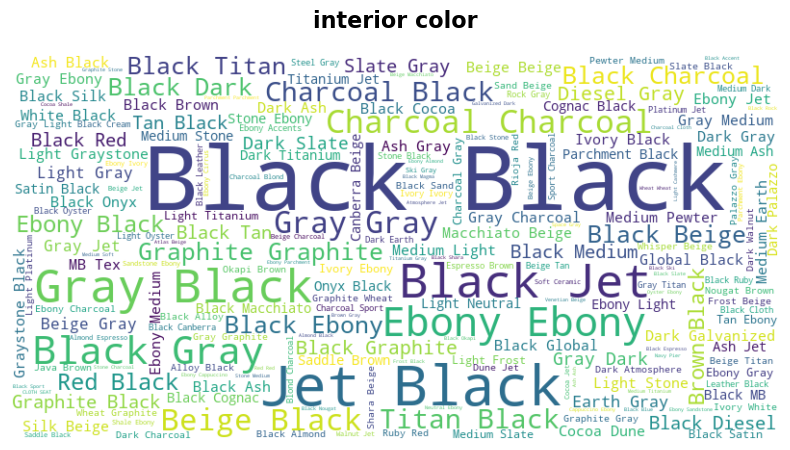

In [24]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_interior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("interior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

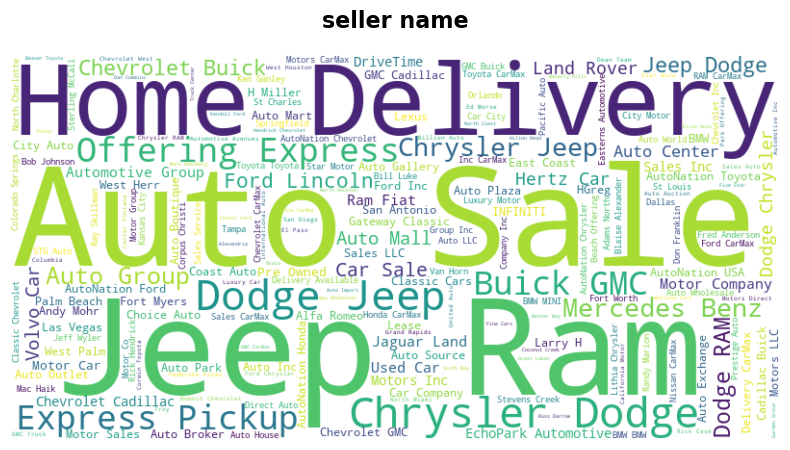

In [25]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_seller_name)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("seller name", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

# Data cleaning : Handling missing values and Preprocessing

### Process breakdown
* `mileage` : Fill method = `median` for `0.05%` missing values 
* `engine`: `mode` for 0.25% missing values 
* `transmission`: fill method = `mode` for `0.9%` missing values 	`
* `drivetrain` :	fill method = `mode` for `3%`	 missing values 
* `fuel_type` : fill method = `mode` for	`4.5%` missing values 	
* `mpg` : fill method = 	`27%`		Impute using median values grouped by `fuel_type`
* `exterior_color` : fill method = `mode` for	`1.8%` missing values 	
* `interior_color` : fill method = `mode` for	`11.5%` missing values 	
* `accidents_or_damage` : fill method = `most_occured` for `2.7%` missing values 	
* `one_owner` : fill method =	`most_occured` for 4% missing values 	
* `personal_use_only` : fill method = `most_occured` for `2.8%` missing values 	
* `seller_name` : fill method = `Drop the column` because of `no relation to the target feature`		
* `seller_rating` : fill method =	`median` for `30%` missing values	
* `driver_rating` : fill method = `median` for `5.8%` missing values	
* `price_drop` : fill method = `Drop the column` because of `a high amount of missing data`

In [29]:
# Let's first seprate the numerical and categorical featres into the respctive categories. Incase if we need to use in further cleaning process.

In [31]:
# ✅ Define Imputation Strategies for Individual Features
impute_methods = {
    "mileage":"median",
    "engine": "most_frequent",
    "transmission": "most_frequent",
    "drivetrain": "most_frequent",
    "fuel_type": "most_frequent",
    # "mpg": , will have to figure out something about this later
    "exterior_color": "most_frequent",
    "interior_color": "most_frequent",
    "accidents_or_damage": "most_frequent",
    "one_owner": "most_frequent",
    "personal_use_only": "most_frequent",
    # "seller_name": "", To be removed
    "seller_rating": "median",
    "driver_rating": "median",
    # "price_drop" To be removed
}

# ✅ Apply the appropriate imputation for each feature
for feature, strategy in impute_methods.items():
    imputer = SimpleImputer(strategy=strategy)
    df[[feature]] = imputer.fit_transform(df[[feature]])


In [35]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.00
1,model,0,0.00
2,year,0,0.00
3,mileage,0,0.00
4,engine,0,0.00
5,transmission,0,0.00
6,drivetrain,0,0.00
7,fuel_type,0,0.00
8,mpg,142071,18.64
9,exterior_color,0,0.00


### Now as per the above observation, we have to drop `price_drop` and `seller_name`, because the `former` is `having nearly 50% missing` data and `later` is `not relevant` for the goal.

In [38]:
# Dropping the features

df.drop(columns=["price_drop", "seller_name"], inplace=True)

### Now there are some modifications needs to be done on the `mpg` feature because the values are in `for eg. 12-18, 10-15, 19-22 format`, we have to fix this and get one average number out of it and then fill the missing values with appropriate mathod.

* Moreover, the `mpg` of any vehicle depends on the type of fuel the particular car is running on, so we need to groupby the fuel_type first to average the mpg for each particular record

In [41]:
# Extracting min and max values from "mpg" format "10-15"
df[['mpg_min', 'mpg_max']] = df["mpg"].str.extract(r'(\d+)-(\d+)')

# Converting to numeric & calculate the average
df["mpg"] = df[['mpg_min', 'mpg_max']].astype(float).mean(axis=1)

# Computing median MPG for each fuel_type
mpg_medians = df.groupby("fuel_type")["mpg"].median()

# Filling missing MPG values with the median of the respective `fuel_type`
df["mpg"] = df.apply(lambda row: mpg_medians[row["fuel_type"]] if pd.isna(row["mpg"]) else row["mpg"], axis=1)

# Filling the remaninig values with overall median of the mpg if there is any
df["mpg"].fillna(df["mpg"].median(), inplace=True)


# Dropping temporary columns
df.drop(columns=["mpg_min", "mpg_max"], inplace=True)

C:\Users\rajgo\AppData\Local\Temp\ipykernel_24856\3374362713.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mpg"].fillna(df["mpg"].median(), inplace=True)


#### Let's now check if there is missing values anymore in our dataset

In [43]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Calculate percentage of missing values
total_rows = len(df)
null_percentage = (null_counts / total_rows * 100).round(2)
null_df["Missing Percentage"] = null_percentage

# Combine the DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Reorder columns for better readability
combined_df = combined_df[["Feature",  "Missing Values", "Missing Percentage"]]

combined_df

,Feature,Missing Values,Missing Percentage
0,manufacturer,0,0.0
1,model,0,0.0
2,year,0,0.0
3,mileage,0,0.0
4,engine,0,0.0
5,transmission,0,0.0
6,drivetrain,0,0.0
7,fuel_type,0,0.0
8,mpg,0,0.0
9,exterior_color,0,0.0


In [44]:
df.nunique()

manufacturer               30
model                   12187
year                      100
mileage                158751
engine                   6903
transmission             1313
drivetrain                 33
fuel_type                  36
mpg                       123
exterior_color           7681
interior_color           4679
accidents_or_damage         2
one_owner                   2
personal_use_only           2
seller_rating              41
driver_rating              35
driver_reviews_num        369
price                   63464
dtype: int64

### Now that we have cleaned the dataset from any missing values, further we have to convert the `object/string` values into `numerical representation` to feed it to the ML algorithm. And find outliers and treat them with a proper method.

In [46]:
df.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price
392314,Jeep,Grand Cherokee Overland,2015,92196.0,"3.6L V-6 DOHC, variable valve control, engine ...",Automatic,Four-wheel Drive,Gasoline,20.5,True Blue Pearlcoat,Light Frost/Brown,0.0,0.0,1.0,4.5,4.8,297.0,24835.0
603416,Nissan,Rogue Sport S,2019,48913.0,2.0L I4 16V GDI DOHC,Automatic CVT,FWD,Gasoline,28.5,White,Black,0.0,1.0,1.0,4.5,4.6,74.0,21998.0
353772,Hyundai,Tucson SEL,2023,3329.0,2.5L I4 16V PDI DOHC,Automatic,All-wheel Drive,Gasoline,24.0,Black,Black,0.0,1.0,1.0,2.6,4.5,3.0,32998.0
138551,Chevrolet,Malibu LT,2019,68951.0,1.5L I4 16V GDI DOHC Turbo,Automatic CVT,Front-wheel Drive,Gasoline,32.5,Blue,Jet Black,0.0,0.0,0.0,4.5,4.6,56.0,18995.0
361236,INFINITI,QX50 ESSENTIAL,2022,1285.0,2.0L I4 16V PDI DOHC Turbo,Automatic CVT,All-wheel Drive,Gasoline,24.0,Graphite Shadow,Graphite,1.0,1.0,1.0,4.2,4.7,0.0,41980.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              762091 non-null  float64
 4   engine               762091 non-null  object 
 5   transmission         762091 non-null  object 
 6   drivetrain           762091 non-null  object 
 7   fuel_type            762091 non-null  object 
 8   mpg                  762091 non-null  float64
 9   exterior_color       762091 non-null  object 
 10  interior_color       762091 non-null  object 
 11  accidents_or_damage  762091 non-null  float64
 12  one_owner            762091 non-null  float64
 13  personal_use_only    762091 non-null  float64
 14  seller_rating        762091 non-null  float64
 15  driver_rating    

#### Maybe we have to convert the float features into integer.


df = df.apply(lambda col: col.astype(int) if col.dtype == 'float64' else col)


In [50]:
df.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price
80312,Cadillac,XT4 Sport,2021,38692.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,Front-wheel Drive,Gasoline,27.0,Radiant Silver Metallic,Jet Black,1.0,1.0,1.0,1.5,4.6,7.0,34953.0
613972,Porsche,Panamera GTS,2014,66995.0,4.8L V8 32V GDI DOHC,7-Speed Automatic with Auto-Shift,All-wheel Drive,Gasoline,20.0,Black,Black,1.0,0.0,1.0,3.2,4.8,22.0,44500.0
268264,Ford,Transit Connect XLT,2020,36331.0,2.0L I4 16V GDI DOHC,8-Speed Automatic,Front-wheel Drive,Gasoline,26.5,Blue Metallic,Palazzo Gray,0.0,1.0,1.0,4.7,3.8,9.0,28998.0
760576,Volvo,C30 T5,2011,151030.0,2.5L I5 20V MPFI DOHC Turbo,5-Speed Automatic,Front-wheel Drive,Gasoline,25.0,Orange,Gray,1.0,0.0,1.0,4.5,4.6,38.0,9995.0
475905,Lexus,RX 350 Base,2014,98212.0,"3.5L V-6 DOHC, VVT-i variable valve control, e...",Automatic,Front-wheel Drive,Gasoline,21.5,Silver Lining Metallic,Black,0.0,0.0,0.0,4.5,4.7,61.0,20990.0


In [58]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Color' column to encode labels
df['model_encoded'] = encoder.fit_transform(df['model'])
df['engine_encoded'] = encoder.fit_transform(df['engine'])
df['transmission_encoded'] = encoder.fit_transform(df['transmission'])
df['drivetrain_encoded'] = encoder.fit_transform(df['drivetrain'])
df['fuel_type_encoded'] = encoder.fit_transform(df['fuel_type'])
df['exterior_color_encoded'] = encoder.fit_transform(df['exterior_color'])
df['interior_color_encoded'] = encoder.fit_transform(df['interior_color'])
df['fuel_type_encoded'] = encoder.fit_transform(df['fuel_type'])




In [60]:
df.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,model_encoded,engine_encoded,transmission_encoded,drivetrain_encoded,fuel_type_encoded,exterior_color_encoded,interior_color_encoded
639473,Subaru,Ascent Limited 7-Passenger,2022,10330.0,2.4L H4 16V GDI DOHC Turbo,Automatic CVT,All-wheel Drive,Gasoline,23.0,Abyss Blue Pearl,Ivory,0.0,1.0,0.0,4.8,4.1,11.0,39999.0,1425,1057,882,10,19,195,2491
109625,Chevrolet,Tahoe LT,2016,144385.0,5.3L V8 16V GDI OHV,6-Speed Automatic,Rear-wheel Drive,Gasoline,19.5,Gray,Black,0.0,0.0,0.0,4.5,4.6,84.0,24985.0,10458,4299,406,31,19,3110,394
198648,Ford,F-150 XLT,2022,11916.0,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Four-wheel Drive,Gasoline,24.0,Oxford White,Black,0.0,1.0,0.0,3.1,4.8,5.0,55995.0,4123,1463,30,22,19,4918,394
393605,Jeep,Grand Cherokee Limited,2020,44831.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Four-wheel Drive,Gasoline,21.5,Granite Crystal Clearcoat Metallic,Black,0.0,0.0,0.0,4.6,4.8,152.0,34950.0,5138,2695,624,22,19,3061,394
185575,Dodge,Durango GT Plus,2019,57724.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,21.5,Billet Clearcoat,Black,0.0,0.0,0.0,4.5,4.7,61.0,29995.0,3325,2695,624,10,19,715,394


In [103]:
# Train test split for model training
x = df[['year','mileage','mpg','accidents_or_damage','one_owner','personal_use_only','seller_rating','driver_rating','driver_reviews_num','model_encoded','engine_encoded','transmission_encoded','drivetrain_encoded','fuel_type_encoded','exterior_color_encoded','interior_color_encoded']]
y = df['price']

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [107]:
x_train.shape

(609672, 16)

### Linear Regression

In [111]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = model.predict(x_test)

# Evaluate the model (Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


Mean Squared Error: 567462708.82
R² Score: 0.01


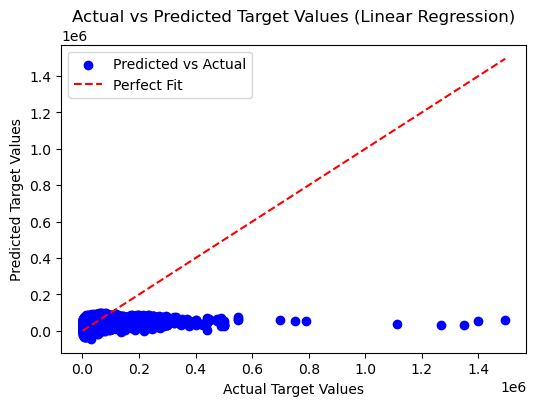

In [113]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Linear Regression)')
plt.legend()
plt.show()

### Decision Tree 

In [116]:
# Decision Tree Regression Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Predictions
y_pred_dtree = tree_model.predict(x_test)

# Evaluate the model (Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred_dtree)
r2 = r2_score(y_test, y_pred_dtree)

Mean Squared Error: 187886882.92
R² Score: 0.67


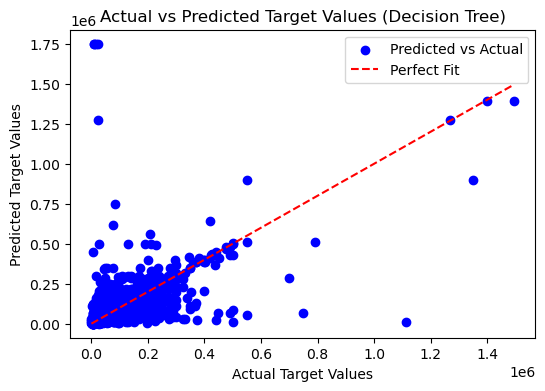

In [117]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_dtree, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Decision Tree)')
plt.legend()
plt.show()

###  Ridge Regression (L2 Regularization)

In [119]:
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate the model (Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

Mean Squared Error: 567461601.75
R² Score: 0.01


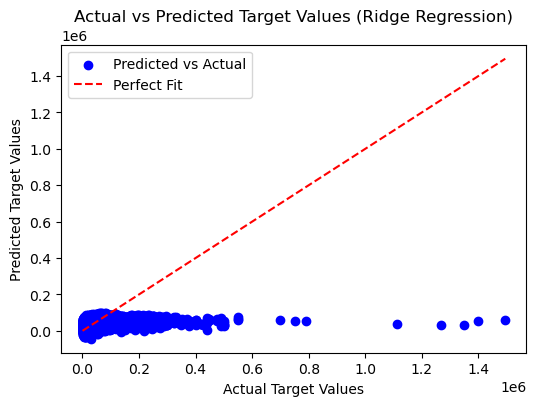

In [120]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Ridge Regression)')
plt.legend()
plt.show()

### SVR

In [192]:
# svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
# svr_model.fit(x_train, y_train)

# y_pred_svr = svr_model.predict(x_test)

# # Evaluate the model (Mean Squared Error and R² score)
# mse = mean_squared_error(y_test, y_pred_svr)
# r2 = r2_score(y_test, y_pred_svr)

Mean Squared Error: 648718306.59
R² Score: -0.03


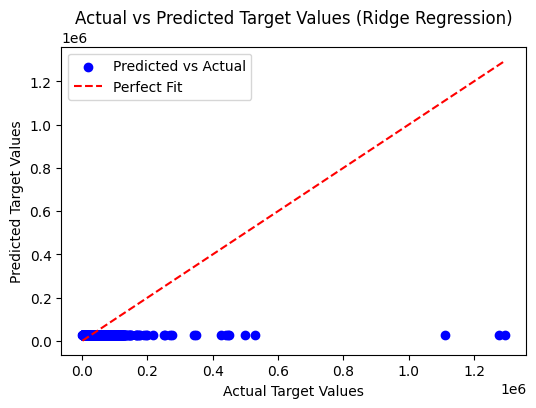

In [193]:
# # Print evaluation metrics
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R² Score: {r2:.2f}')

# # Plotting the actual vs predicted values
# plt.figure(figsize=(6, 4))
# plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
# plt.xlabel('Actual Target Values')
# plt.ylabel('Predicted Target Values')
# plt.title('Actual vs Predicted Target Values (Ridge Regression)')
# plt.legend()
# plt.show()

### Gradient boosting with xgb

In [125]:
# Gradient Boosting Regression Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_test, y_test)

y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model (Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

Mean Squared Error: 80858585.35
R² Score: 0.86


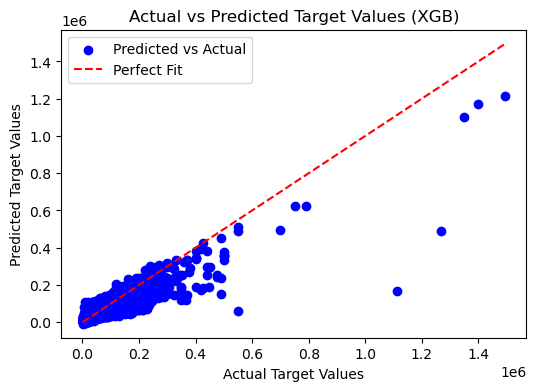

In [127]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (XGB)')
plt.legend()
plt.show()

### KNN Regression

In [129]:
# KNN Regression Model
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(x_test, y_test)

# Predictions
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model (Mean Squared Error and R² score)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

Mean Squared Error: 104046714.65
R² Score: 0.82


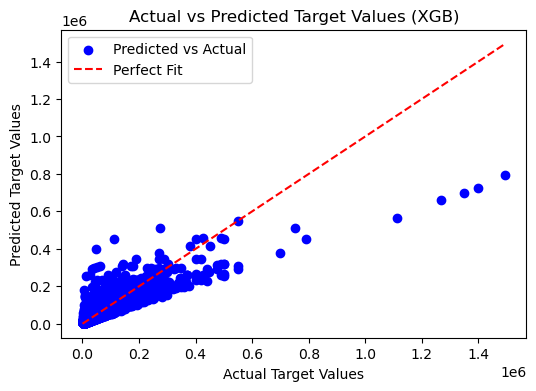

In [131]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (XGB)')
plt.legend()
plt.show()

### Maybe we need to try more algorithm techniques, NN, or try feature enginering, feature selection techniques, normalization, standardization, or try changing the encoding technique(prob. embeddings), 

In [142]:
import joblib

# Export the trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [144]:
# Load the saved XGBoost model
loaded_model = joblib.load('xgb_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(x_test)


In [148]:
def get_user_input():
    # Assuming the model expects a 2D array with features (for example, 3 features)
    # You can adjust this based on your actual model's feature requirements
    print("Enter values for the features:")

    # Example for 3 features; adjust according to your model's needs
    feature1 = float(input("Enter value for year of the car 1: "))
    feature2 = float(input("Enter value for mileage 2: "))
    feature3 = float(input("Enter value for mpg 3: "))
    feature4 = float(input("Enter value for accidente or damage (0=No/1=Yes) 4: "))
    feature5 = float(input("Enter value for number of owners 5: "))
    feature6 = float(input("Enter value for if personal use or not  6: "))
    feature7 = float(input("Enter value for seller rating 7: "))
    feature8 = float(input("Enter value for driver rating 8: "))
    feature9 = float(input("Enter value for driver reviews num 9: "))
    feature10 = float(input("Enter value for model encoded 10: "))
    feature11 = float(input("Enter value for engine encoded 11: "))
    feature12 = float(input("Enter value for transmission encoded 12: "))
    feature13 = float(input("Enter value for drivetrain  13: "))
    feature14 = float(input("Enter value for fuel type 14: "))
    feature15 = float(input("Enter value for exterior color 15: "))
    feature16 = float(input("Enter value for interior color. 16: "))
    

    # Create an array of the features
    user_input = np.array([[feature1,
                            feature2,
                            feature3,
                            feature4,
                            feature5,
                            feature6,
                            feature7,
                            feature8,
                            feature9,
                            feature10,
                            feature11,
                            feature12, 
                            feature13, 
                            feature14, 
                            feature15, 
                            feature16,]])

    return user_input

# Get user input
user_input = get_user_input()

# Predict using the loaded model
prediction = xgb_model.predict(user_input)

# Display the prediction
print(f"The model's prediction is: {prediction[0]}")

Enter values for the features:


Enter value for feature 1:  2015
Enter value for feature 2:  81408
Enter value for feature 3:  23.5
Enter value for feature 4:  0
Enter value for feature 5:  0
Enter value for feature 6:  0
Enter value for feature 7:  1.2
Enter value for feature 8:  5.0
Enter value for feature 9:  2.0
Enter value for feature 10:  1042
Enter value for feature 11:  393
Enter value for feature 12:  265
Enter value for feature 13:  8
Enter value for feature 14:  8
Enter value for feature 15:  1093
Enter value for feature 16:  66


The model's prediction is: 113054.4765625
